The purpose of this project is to determine whether certain features can help me determine if I am diabetic. To do this I took a database containing 768 samples of people with particular characteristics and if they were diagnosed with diabetes. The reason I have taken this project is because I have inherited diabetes from both sides of my family. I am very paranoid about genetic conditions and therefore I want to create a model that can help me determine if I am at risk of being diabetic. 

The process is two steps. The first one is to observe a few features and how they co-relate to diabetes based on hypothesis testing. The second part is to create a model using all the features to determine if they are sufficient to make an accurate prediction on whether someone can be diagnosed with diabetes or not using the training data and features from the table. 

In [2]:
from datascience import *
import numpy as np
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# blue and red markers by default
Table.chart_colors=('blue', 'red')
# white background by default
plots.rcParams['figure.facecolor']='white'
plots.rcParams['axes.facecolor']='white'

In [3]:
diabetes = Table().read_table("diabetes.csv")
diabetes

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1


The test is to determine if whether a higher bmi or lower bmi is more likely to have diabetes

We split the data into two halves. The highest recorded bmi is 67.1 and the lowest is 0.0

we split it down the middle and make two sets. 
one where the bmi is either 33.6 or higher and the other where it is 33.5 or lower

Null Hypothesis: People with lower bmi and higher BMi will have the same possibility of being diagnoses with diabetes

Test statistic: Absolute value of the mean of outcomes for people with low bmi and higher bmi

In [4]:
bmi = diabetes.column("BMI")
low_bmi = diabetes.where("BMI", are.below(33.6))
high_bmi = diabetes.where("BMI",are.above_or_equal_to(33.6))

otp_lb = low_bmi.column("Outcome")
otp_hb = high_bmi.column("Outcome")
print("Mean of low BMI patients: ",np.mean(otp_lb))
print("Mean of high BMI patients: ", np.mean(otp_hb))



Mean of low BMI patients:  0.26
Mean of high BMI patients:  0.474842767296


In [56]:
observed_value = abs(np.average(otp_lb) - np.average(otp_hb))
observed_value

0.21484276729559748

Text(0, 0.5, 'Percent per unit')

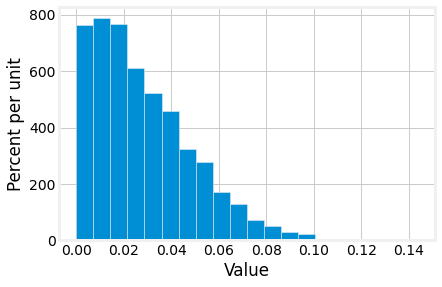

In [57]:
possible_bmi = np.append(otp_lb,otp_hb)
table_bmi = Table().with_columns("Iteration", make_array(), "Value",make_array())


for i in np.arange(5000):
  low = np.random.choice(possible_bmi, len(otp_lb))
  high = np.random.choice(possible_bmi, len(otp_hb))
  value = abs(np.average(low)-np.average(high))
  table_bmi.append((i,value))

plots.hist(table_bmi.column("Value"),bins = 20)
plots.xlabel("Value")
plots.ylabel("Percent per unit")

In [7]:
table_bmi

Iteration,Value
0,0.00389937
1,0.00171908
2,0.00385744
3,0.0214675
4,0.00981132
5,0.0641929
6,0.00348008
7,0.0725786
8,0.032914
9,0.0486792


In [8]:
p_value = np.average(table_bmi.column("Value") > observed_value)
print("p-value of test:", p_value)

p-value of test: 0.0


We do not accept the Null Hypothesis based on our P-value which suggests that people with higher and lower BMIs are at the same risk of being diabetic. This makes sense as honorhealth.com confirms that having a higher BMI increases the risk of diabetes significantly

We will take another feature to perform the same test. We will test whether pregancies affect the risk of diabetes. Even though this does not correlate to my reason for doing this project which is to assess my own possibility of having diabetes, with the dataset I have been provided, I can loosely assume my own conclusion considering that all males will be in the category of no pregnancies and if this test goes against the null hypothesis, that would be news that can help me determine my own odds. 

We will split the data into two halves. Those who have never been pregnant and those who have one or more pregnancies. 

Null Hypothesis: People with 0 pregnancies and people with 1 or more pregnancies will have the same risk of diabetes.

Test statistic: Absolute value of the mean of outcomes for people with 0 pregnancies and 1 or more pregnancies

Null Hypothesis: People with lower bmi and higher BMi will have the same possibility of being diagnoses with diabetes

Test statistic: Absolute value of the mean of outcomes for people with low bmi and higher bmi

In [58]:
Preg = diabetes.column("Pregnancies")
no_preg = diabetes.where("Pregnancies", are.equal_to(0))
yes_preg = diabetes.where("Pregnancies",are.above_or_equal_to(1))

otp_np = no_preg.column("Outcome")
otp_yp = yes_preg.column("Outcome")
print("Mean of No pregnancy patients: ",np.mean(otp_np))
print("Mean of Patients who have been pregnant: ", np.mean(otp_yp))

Mean of No pregnancy patients:  0.342342342342
Mean of Patients who have been pregnant:  0.350076103501


In [59]:
observed_value = abs(np.average(otp_np) - np.average(otp_yp))
observed_value

0.0077337611584186727

Text(0, 0.5, 'Percent per unit')

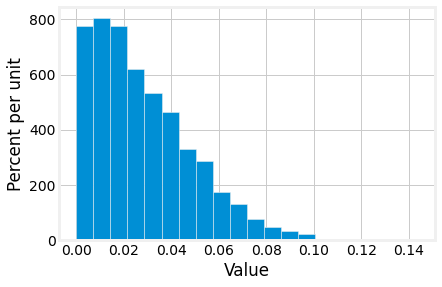

In [62]:
possible_preg = np.append(otp_np,otp_yp)
table_preg = Table().with_columns("Iteration", make_array(), "Value",make_array())


for i in np.arange(100):
  no = np.random.choice(possible_preg, len(otp_np))
  yes = np.random.choice(possible_preg, len(otp_yp))
  value = abs(np.average(no)-np.average(yes))
  table_preg.append((i,value))

plots.hist(table_bmi.column("Value"),bins = 20)
plots.xlabel("Value")
plots.ylabel("Percent per unit")

In [63]:
p_value = np.average(table_preg.column("Value") > observed_value)
print("p-value of test:", p_value)

p-value of test: 0.92


In this case the p value is significantly higher at 92% which shows that we have failed to reject the null hypothesis which was that pregnancies do not affect diabetes. Based on our result we will accept this as true and moving forward we will not use pregnancies in our ML model. 

Step 2 of this project is to use an ML model to determine the likelihood of diabetes using all the other factors

since our features have different ranges we will have to normalise all the features so that our labels come out more accurately

In [64]:

Glucose = diabetes.column("Glucose")
BloodPressure = diabetes.column("BloodPressure")
SkinThickness = diabetes.column("SkinThickness")
Insulin = diabetes.column("Insulin")
BMI = diabetes.column("BMI")
PD = diabetes.column("DiabetesPedigreeFunction")
Age = diabetes.column("Age")


Glucose_std = (Glucose-np.mean(Glucose))/np.std(Glucose)
BloodPressure_std = (BloodPressure-np.mean(BloodPressure))/np.std(BloodPressure)
SkinThickness_std = (SkinThickness-np.mean(SkinThickness))/np.std(SkinThickness)
Insulin_std = (Insulin-np.mean(Insulin))/np.std(Insulin)
BMI_std = (BMI-np.mean(BMI))/np.std(BMI)
Age_std = (Age-np.mean(Age))/np.std(Age)
PD_std = (PD - np.mean(PD))/np.std(PD)

std_table = Table().with_columns(
                                 "Glucose_std",Glucose_std,
                                 "BloodPressure_std",BloodPressure_std,
                                 "SkinThickness_std",SkinThickness_std,
                                 "Insulin_std", Insulin_std,
                                 "BMI_std",BMI_std,
                                 "Age_std",Age_std,
                                 "PD_std",PD_std)
std_table

Glucose_std,BloodPressure_std,SkinThickness_std,Insulin_std,BMI_std,Age_std,PD_std
0.848324,0.149641,0.90727,-0.692891,0.204013,1.426,0.468492
-1.1234,-0.160546,0.530902,-0.692891,-0.684422,-0.190672,-0.365061
1.94372,-0.263941,-1.28821,-0.692891,-1.10326,-0.105584,0.604397
-0.998208,-0.160546,0.154533,0.123302,-0.494043,-1.04155,-0.920763
0.504055,-1.50469,0.90727,0.765836,1.40975,-0.0204964,5.48491
-0.153185,0.253036,-1.28821,-0.692891,-0.811341,-0.27576,-0.818079
-1.34248,-0.98771,0.719086,0.0712043,-0.125977,-0.616111,-0.676133
-0.184482,-3.5726,-1.28821,-0.692891,0.419775,-0.360847,-1.02043
2.38188,0.0462453,1.53455,4.02192,-0.189437,1.68126,-0.947944
0.128489,1.39039,-1.28821,-0.692891,-4.06047,1.76635,-0.724455


Pregnancies = diabetes.column("Pregnancies")
Pregnancies_std = (Pregnancies-np.mean(Pregnancies))/np.std(Pregnancies)

In [65]:
X = std_table.select(
                                 "Glucose_std",
                                 "BloodPressure_std",
                                 "SkinThickness_std",
                                 "Insulin_std",
                                 "BMI_std",
                                 "Age_std",
                                 "PD_std").values
y = diabetes.column("Outcome")


X_train, X_test, y_train, y_test, = train_test_split(X, y, train_size=0.8)

In [66]:
neural_network = MLPClassifier()
neural_network.fit(X_train, y_train)
y_pred = neural_network.predict(X_test)
accuracy = sum(y_test == y_pred) / len(y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.779220779221


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [67]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = sum(y_test == y_pred) / len(y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.74025974026


In [68]:
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)
y_pred = xgboost_model.predict(X_test)
accuracy = sum(y_test == y_pred) / len(y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.785714285714


In conclusion we see that all of these models range between 74% to 80% accuracy and that tells us that these features are accurate in predicting diabetes but not as accurate as we would hope for them to be. The conclusion of this test is that more parameters that are associated with Diabetes need to be accounted for to have a more accurate prediction. That being said, the purpose of this project was to determine if I was at risk of being diabetic. I cannot pass a conclusion on that because these models are not accurate enough. The goal was to create a model where I could put all of these parameters with my own measurement and determine how much risk I had of being diabetic but I need to find more features so that I can make a more accurate prediction

DataSet


iabetes.csv from Kaggle by 
Akshay Dattatray Khare (Owner)

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

CC0: Public Domain

Authors
keyboard_arrow_up
AUTHOR NAME
Pima Indians
BIO
UCI MACHINE LEARNING
Coverage
keyboard_arrow_up
TEMPORAL COVERAGE START DATE
08/04/2016
TEMPORAL COVERAGE END DATE
08/04/2022
GEOSPATIAL COVERAGE
Pima Indians